<a href="https://colab.research.google.com/github/HariPrabu741/Deep-Learning-Car-Brand-Project/blob/main/Car_classification_resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
# Importing the packages for model creation

from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from glob import glob
import numpy as np
import matplotlib.pyplot as plt


In [42]:
!unzip '/content/Datasets.zip'

Archive:  /content/Datasets.zip
replace Datasets/Test/audi/21.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: all
error:  invalid response [all]
replace Datasets/Test/audi/21.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: All
  inflating: Datasets/Test/audi/21.jpg  
  inflating: Datasets/Test/audi/22.jpg  
  inflating: Datasets/Test/audi/23.jpg  
  inflating: Datasets/Test/audi/24.jpg  
  inflating: Datasets/Test/audi/25.jpg  
  inflating: Datasets/Test/audi/26.jpg  
  inflating: Datasets/Test/audi/27.jpg  
 extracting: Datasets/Test/audi/28.jpg  
  inflating: Datasets/Test/audi/29.jpg  
  inflating: Datasets/Test/lamborghini/1.jpg  
  inflating: Datasets/Test/lamborghini/10.jpg  
  inflating: Datasets/Test/lamborghini/11.jpg  
  inflating: Datasets/Test/lamborghini/12.jpg  
  inflating: Datasets/Test/lamborghini/13.jpg  
  inflating: Datasets/Test/lamborghini/14.jpg  
  inflating: Datasets/Test/lamborghini/15.jpg  
  inflating: Datasets/Test/lamborghini/16.jpg  
  inflating: Datasets/Test/lamb

In [43]:
train_path="/content/Datasets/Train"
test_path="/content/Datasets/Test"
img_size=[224,224]

In [44]:
resnet=ResNet50(include_top=False, weights='imagenet', input_shape=img_size + [3])

In [45]:
for layers in resnet.layers:
  layers.trainable=False

In [46]:
folder=glob("/content/Datasets/Train/*")
len(folder)

3

In [47]:
x=Flatten()(resnet.output)

In [48]:
prediction=Dense(len(folder),activation='softmax')(x)

In [49]:
model=Model(inputs=resnet.input,outputs=prediction)

In [50]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [51]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [52]:
train_gen = ImageDataGenerator(rescale = 1./255,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip = True)

test_gen = ImageDataGenerator(rescale = 1./255)

In [53]:
training_set = train_gen.flow_from_directory(train_path,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='categorical')

Found 64 images belonging to 3 classes.


In [54]:
testing_set = test_gen.flow_from_directory(test_path,
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode='categorical')

Found 58 images belonging to 3 classes.


In [55]:
#from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [56]:
#early_stop=EarlyStopping(monitor='val_accuracy',patience=10)
#reduce_lr=ReduceLROnPlateau(monitor='val_accuracy',factor=0.5,patience=10,min_lr=0.0001)

In [57]:
r=model.fit_generator(training_set,
                      steps_per_epoch=len(training_set),
                      epochs=50,
                      validation_data=testing_set,
                      validation_steps=len(testing_set))
                      

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 7s 2s/step - loss: 6.3396 - accuracy: 0.3438 - val_loss: 8.2081 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 2s 983ms/step - loss: 7.2056 - accuracy: 0.3750 - val_loss: 7.6963 - val_accuracy: 0.1552
Epoch 3/50
2/2 [==============================] - 2s 950ms/step - loss: 7.1246 - accuracy: 0.3906 - val_loss: 6.5866 - val_accuracy: 0.5172
Epoch 4/50
2/2 [==============================] - 2s 933ms/step - loss: 6.2360 - accuracy: 0.3125 - val_loss: 1.2041 - val_accuracy: 0.4310
Epoch 5/50
2/2 [==============================] - 2s 930ms/step - loss: 1.9628 - accuracy: 0.4844 - val_loss: 6.2371 - val_accuracy: 0.3621
Epoch 6/50
2/2 [==============================] - 2s 944ms/step - loss: 4.1496 - accuracy: 0.5312 - val_loss: 7.1997 - val_accuracy: 0.2931
Epoch 7/50
2/2 [==============================] - 2s 926ms/step - loss: 3.7982 - accuracy: 0.5625 - val_loss: 4.5507 - val_accuracy: 0.3448
Epoch 8/50
2/2 [=======

In [58]:
#r.history

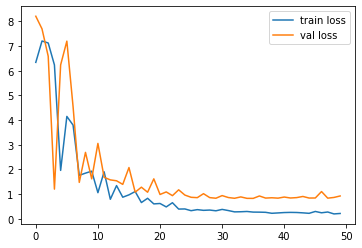

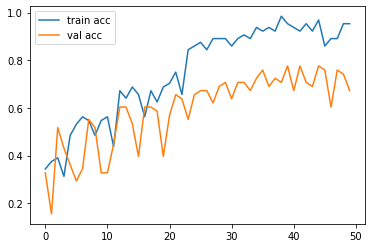

<Figure size 432x288 with 0 Axes>

In [59]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()


# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


In [60]:
model.save('car_classification_resnet50.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [61]:
ypred=model.predict(testing_set)

In [62]:
ypred

array([[7.8723915e-02, 3.5989216e-01, 5.6138390e-01],
       [2.7799439e-01, 2.8262898e-02, 6.9374275e-01],
       [2.8799815e-02, 2.8193146e-01, 6.8926871e-01],
       [8.5077628e-02, 6.1749827e-02, 8.5317260e-01],
       [1.7566659e-01, 4.6225286e-01, 3.6208048e-01],
       [6.1067808e-02, 2.8090930e-01, 6.5802294e-01],
       [1.4294474e-01, 2.7020365e-01, 5.8685166e-01],
       [1.9023926e-03, 9.8511803e-01, 1.2979496e-02],
       [4.0972564e-02, 3.2844761e-01, 6.3057977e-01],
       [6.1285417e-03, 4.8215315e-01, 5.1171833e-01],
       [2.1727845e-02, 8.0101341e-01, 1.7725874e-01],
       [3.8950026e-01, 5.1597679e-01, 9.4522886e-02],
       [5.1106941e-03, 1.8519502e-02, 9.7636980e-01],
       [3.3642627e-02, 8.4969860e-01, 1.1665880e-01],
       [5.1898330e-01, 1.8801995e-01, 2.9299682e-01],
       [9.7474200e-01, 9.4597116e-03, 1.5798304e-02],
       [3.8271535e-02, 8.7757760e-01, 8.4150903e-02],
       [1.8965155e-02, 1.4999770e-01, 8.3103716e-01],
       [3.8207800e-04, 9.842

In [63]:
classes=np.argmax(ypred,axis=1)

In [64]:
classes

array([2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 0, 0, 1, 2, 1, 0, 0, 2,
       2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 1, 1, 2, 1, 2, 2,
       2, 1, 0, 2, 1, 0, 1, 2, 2, 1, 1, 2, 2, 1])

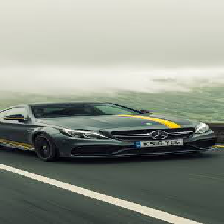

In [95]:
img=image.load_img("/content/Datasets/Test/mercedes/44.jpg",target_size=(224,224))
img

In [96]:
x=image.img_to_array(img)
x

array([[[227., 227., 215.],
        [227., 227., 215.],
        [227., 227., 215.],
        ...,
        [227., 227., 217.],
        [227., 227., 217.],
        [227., 227., 217.]],

       [[227., 227., 215.],
        [227., 227., 215.],
        [227., 227., 215.],
        ...,
        [227., 227., 217.],
        [227., 227., 217.],
        [227., 227., 217.]],

       [[227., 227., 215.],
        [227., 227., 215.],
        [227., 227., 215.],
        ...,
        [227., 227., 217.],
        [227., 227., 217.],
        [227., 227., 217.]],

       ...,

       [[ 62.,  71.,  66.],
        [ 60.,  69.,  64.],
        [ 60.,  69.,  64.],
        ...,
        [ 61.,  72.,  64.],
        [ 61.,  72.,  64.],
        [ 60.,  71.,  63.]],

       [[ 61.,  70.,  65.],
        [ 61.,  70.,  65.],
        [ 61.,  70.,  65.],
        ...,
        [ 70.,  81.,  73.],
        [ 70.,  81.,  73.],
        [ 69.,  80.,  72.]],

       [[ 61.,  70.,  65.],
        [ 61.,  70.,  65.],
        [ 61.,  

In [97]:
x.shape

(224, 224, 3)

In [98]:
x=x/255
x

array([[[0.8901961 , 0.8901961 , 0.84313726],
        [0.8901961 , 0.8901961 , 0.84313726],
        [0.8901961 , 0.8901961 , 0.84313726],
        ...,
        [0.8901961 , 0.8901961 , 0.8509804 ],
        [0.8901961 , 0.8901961 , 0.8509804 ],
        [0.8901961 , 0.8901961 , 0.8509804 ]],

       [[0.8901961 , 0.8901961 , 0.84313726],
        [0.8901961 , 0.8901961 , 0.84313726],
        [0.8901961 , 0.8901961 , 0.84313726],
        ...,
        [0.8901961 , 0.8901961 , 0.8509804 ],
        [0.8901961 , 0.8901961 , 0.8509804 ],
        [0.8901961 , 0.8901961 , 0.8509804 ]],

       [[0.8901961 , 0.8901961 , 0.84313726],
        [0.8901961 , 0.8901961 , 0.84313726],
        [0.8901961 , 0.8901961 , 0.84313726],
        ...,
        [0.8901961 , 0.8901961 , 0.8509804 ],
        [0.8901961 , 0.8901961 , 0.8509804 ],
        [0.8901961 , 0.8901961 , 0.8509804 ]],

       ...,

       [[0.24313726, 0.2784314 , 0.25882354],
        [0.23529412, 0.27058825, 0.2509804 ],
        [0.23529412, 0

In [99]:
x=np.expand_dims(x,axis=0)
x

array([[[[0.8901961 , 0.8901961 , 0.84313726],
         [0.8901961 , 0.8901961 , 0.84313726],
         [0.8901961 , 0.8901961 , 0.84313726],
         ...,
         [0.8901961 , 0.8901961 , 0.8509804 ],
         [0.8901961 , 0.8901961 , 0.8509804 ],
         [0.8901961 , 0.8901961 , 0.8509804 ]],

        [[0.8901961 , 0.8901961 , 0.84313726],
         [0.8901961 , 0.8901961 , 0.84313726],
         [0.8901961 , 0.8901961 , 0.84313726],
         ...,
         [0.8901961 , 0.8901961 , 0.8509804 ],
         [0.8901961 , 0.8901961 , 0.8509804 ],
         [0.8901961 , 0.8901961 , 0.8509804 ]],

        [[0.8901961 , 0.8901961 , 0.84313726],
         [0.8901961 , 0.8901961 , 0.84313726],
         [0.8901961 , 0.8901961 , 0.84313726],
         ...,
         [0.8901961 , 0.8901961 , 0.8509804 ],
         [0.8901961 , 0.8901961 , 0.8509804 ],
         [0.8901961 , 0.8901961 , 0.8509804 ]],

        ...,

        [[0.24313726, 0.2784314 , 0.25882354],
         [0.23529412, 0.27058825, 0.2509804 ]

In [100]:
x.shape

(1, 224, 224, 3)

In [101]:
img_data=preprocess_input(x)
img_data

array([[[[-103.09586 , -115.8888  , -122.7898  ],
         [-103.09586 , -115.8888  , -122.7898  ],
         [-103.09586 , -115.8888  , -122.7898  ],
         ...,
         [-103.08802 , -115.8888  , -122.7898  ],
         [-103.08802 , -115.8888  , -122.7898  ],
         [-103.08802 , -115.8888  , -122.7898  ]],

        [[-103.09586 , -115.8888  , -122.7898  ],
         [-103.09586 , -115.8888  , -122.7898  ],
         [-103.09586 , -115.8888  , -122.7898  ],
         ...,
         [-103.08802 , -115.8888  , -122.7898  ],
         [-103.08802 , -115.8888  , -122.7898  ],
         [-103.08802 , -115.8888  , -122.7898  ]],

        [[-103.09586 , -115.8888  , -122.7898  ],
         [-103.09586 , -115.8888  , -122.7898  ],
         [-103.09586 , -115.8888  , -122.7898  ],
         ...,
         [-103.08802 , -115.8888  , -122.7898  ],
         [-103.08802 , -115.8888  , -122.7898  ],
         [-103.08802 , -115.8888  , -122.7898  ]],

        ...,

        [[-103.680176, -116.500565, -1

In [102]:
img_data.shape

(1, 224, 224, 3)

In [103]:
im_pred=model.predict(img_data)


In [105]:
np.argmax(im_pred,axis=1)

array([2])